In [2]:
"""Domanda 4 (Compressione SVD). Discutere la compressione di un’immagine ottenuta 
approssimandola con diadi calcolate mediante la decomposizione in valori singolari, 
visualizzando le immagini ottenute al variare del numero p di diadi. 
Analizzare inoltre i grafici dell’errore relativo e del fattore di compressione cp al 
variare di p."""
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from skimage import data 
from skimage.io import imread

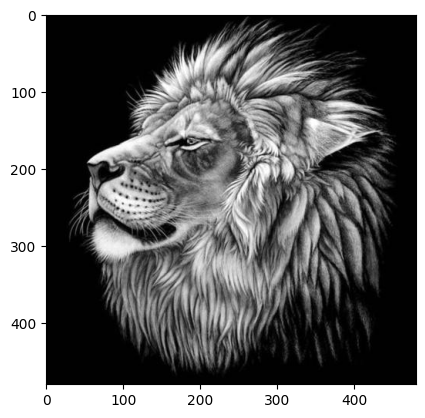

Shape of U: (480, 480)
Shape of s: (480,)
Shape of V: (480, 480)


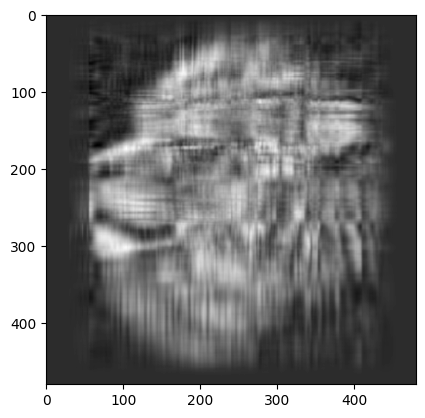

L'errore relativo della ricostruzione di A è 0.08415692254115513
Il fattore di compressione è c= 47.0


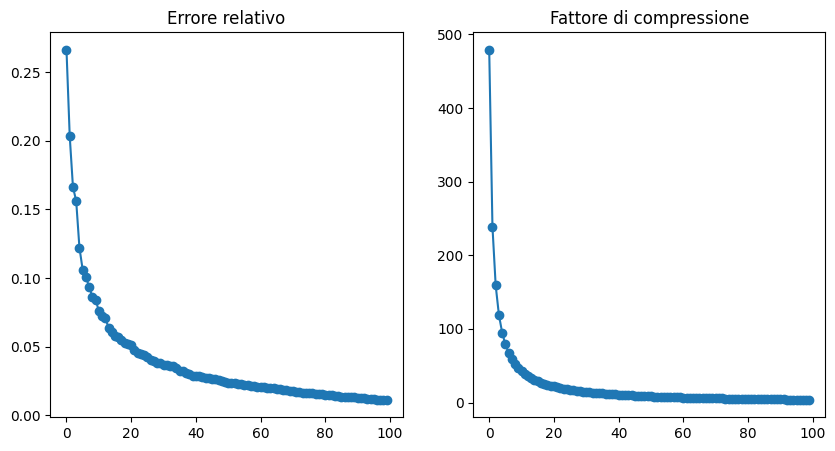

In [3]:
A = imread('image2.png')
plt.imshow(A, cmap='grey')
plt.show()

U, s, Vh = svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

A_p = np.zeros(A.shape)
p_max = 10

for i in range(p_max):
  ui = U[:, i]
  vi = Vh[i, :]
  A_p = A_p + s[i]*np.outer(ui,vi)  

plt.imshow(A_p, cmap='grey')
plt.show()

err_rel = np.linalg.norm(A - A_p, ord=2) / np.linalg.norm(A, ord=2) 
print('L\'errore relativo della ricostruzione di A è', err_rel)

c = (1/p_max) * min(A.shape) -1
print('Il fattore di compressione è c=', c)

p_max = 100
A_p = np.zeros(A.shape)
err_rel = np.zeros((p_max))
c = np.zeros((p_max))


for i in range(p_max):
  ui = U[:, i]
  vi = Vh[i, :]

  A_p = A_p + s[i]*np.outer(ui,vi)
  err_rel[i] = np.linalg.norm(A - A_p, ord=2) / np.linalg.norm(A, ord=2)
  c[i] = (1/(i+1)) * min(A.shape) -1 

plt.figure(figsize=(10, 5))

fig1 = plt.subplot(1, 2, 1)
fig1.plot(err_rel, 'o-')
plt.title('Errore relativo')

fig2 = plt.subplot(1, 2, 2)
fig2.plot(c, 'o-')
plt.title('Fattore di compressione')

plt.show()